Enter email:
k.t.dobiczek@student.tudelft.nl
Enter password
········

Result from the remote Quantum Inspire backend:

State	Counts
00 0 0	510
11 0 0	514

Result from the local Qiskit simulator backend:

{'11 0 0': 512, '00 0 0': 512}


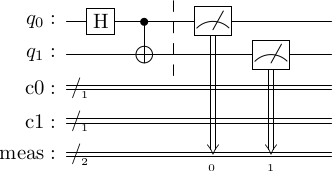

In [5]:
"""Example usage of the Quantum Inspire backend with the Qiskit SDK.
A simple example that demonstrates how to use the SDK to create
a circuit to demonstrate conditional gate execution.
For documentation on how to use Qiskit we refer to
[https://qiskit.org/](https://qiskit.org/).
Specific to Quantum Inspire is the creation of the QI instance, which is used to set the authentication
of the user and provides a Quantum Inspire backend that is used to execute the circuit.
Copyright 2018-19 QuTech Delft. Licensed under the Apache License, Version 2.0.
"""
import os

from qiskit import BasicAer, execute
from qiskit.circuit import QuantumRegister, ClassicalRegister, QuantumCircuit

from quantuminspire.credentials import get_authentication
from quantuminspire.qiskit import QI

QI_URL = os.getenv('API_URL', 'https://api.quantum-inspire.com/')


authentication = get_authentication()
QI.set_authentication(authentication, QI_URL)
qi_backend = QI.get_backend('QX single-node simulator')

q = QuantumRegister(2, "q")
c0 = ClassicalRegister(1, "c0")
c1 = ClassicalRegister(1, "c1")
qc = QuantumCircuit(3, name="conditional")

qc.h([0, 2])
qc.cnot(q[0], q[1])

qc.measure_all()

qi_job = execute(qc, backend=qi_backend, shots=1024)
qi_result = qi_job.result()
histogram = qi_result.get_counts(qc)
print("\nResult from the remote Quantum Inspire backend:\n")
print('State\tCounts')
[print('{0}\t{1}'.format(state, counts)) for state, counts in histogram.items()]

print("\nResult from the local Qiskit simulator backend:\n")
backend = BasicAer.get_backend("qasm_simulator")
job = execute(qc, backend=backend, shots=1024)
result = job.result()
print(result.get_counts(qc))
qc.draw(output="latex")